# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

     -------------------------------------- 675.6/675.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=8978fd72a39270e7807f3c32ef3f2e9eb1e131cd8603beb1ec954fc2e799a03c
  Stored in directory: c:\users\haave\appdata\local\pip\cache\wheels\49\05\c1\6baa8ceb020ca642133e903591948e0fbe269e9c519aefd95d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | cabedelo
Processing Record 5 of Set 1 | inekar
City not found. Skipping...
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | mejit
Processing Record 11 of Set 1 | lichinga
Processing Record 12 of Set 1 | labytnangi
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | tranovaho
City no

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,279.72,62,52,5.24,NZ,1691329697
1,inhambane,-23.8650,35.3833,296.15,53,11,5.87,MZ,1691329697
2,bethel,41.3712,-73.4140,298.57,70,0,0.00,US,1691329698
3,cabedelo,-6.9811,-34.8339,301.52,72,5,7.02,BR,1691329698
4,ribeira grande,38.5167,-28.7000,298.37,73,20,3.60,PT,1691329698


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities1.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities1.csv", index_col="City_ID")

# Convert temperature from Kelvin to Celsius
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,waitangi,-43.9535,-176.5597,279.72,62,52,5.24,NZ,1691329697,6.57
1,inhambane,-23.8650,35.3833,296.15,53,11,5.87,MZ,1691329697,23.00
2,bethel,41.3712,-73.4140,298.57,70,0,0.00,US,1691329698,25.42
3,cabedelo,-6.9811,-34.8339,301.52,72,5,7.02,BR,1691329698,28.37
4,ribeira grande,38.5167,-28.7000,298.37,73,20,3.60,PT,1691329698,25.22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

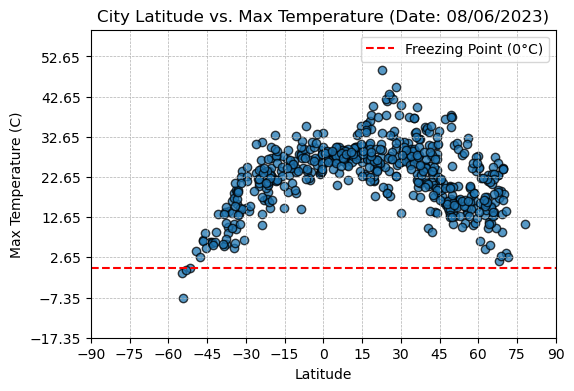

In [26]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (Date: 08/06/2023)")
plt.grid(True)

# Incorporate the other graph properties

# Set the x-axis limits from -90 to 90 degrees (latitude range)
plt.xlim(-90, 90)  
# Set the y-axis limits with some buffer
plt.ylim(min(city_data_df["Max Temp (C)"]) - 10, max(city_data_df["Max Temp (C)"]) + 10)  
# Set the x-axis tick marks every 15 degrees
plt.xticks(np.arange(-90, 91, 15)) 
# Set the y-axis tick marks every 10 degrees
plt.yticks(np.arange(min(city_data_df["Max Temp (C)"]) - 10, max(city_data_df["Max Temp (C)"]) + 11, 10))  
# Add gridlines with a dashed linestyle and linewidth
plt.grid(True, linestyle="--", linewidth=0.5)

# Add a horizontal line at the freezing point (0 degrees Celsius)
plt.axhline(0, color="r", linestyle="--", label="Freezing Point (0°C)")

# Add a legend
plt.legend(loc="best")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

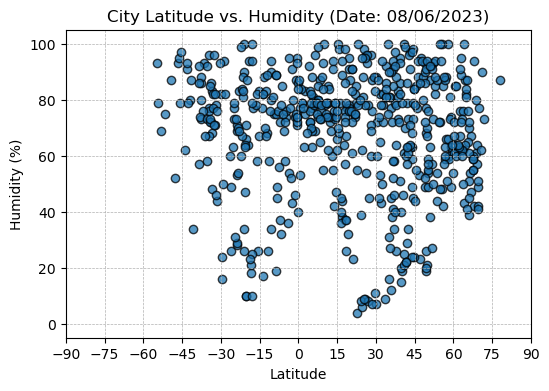

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 4))

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Date: 08/06/2023)")
plt.grid(True)

# Incorporate the other graph properties
plt.xlim(-90, 90)  # Set the x-axis limits from -90 to 90 degrees (latitude range)
plt.ylim(-5, 105)  # Set the y-axis limits from -5 to 105% for humidity values
plt.xticks(np.arange(-90, 91, 15))  # Set the x-axis tick marks every 15 degrees
plt.yticks(np.arange(0, 101, 20))  # Set the y-axis tick marks at intervals of 20%
plt.grid(True, linestyle="--", linewidth=0.5)  # Add gridlines with a dashed linestyle and linewidth

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

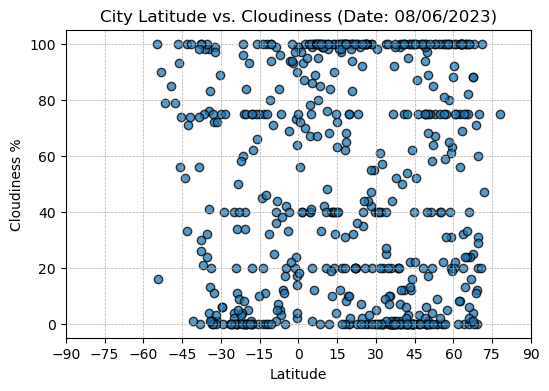

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 4))

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (Date: 08/06/2023)")
plt.grid(True)


# Incorporate the other graph properties
plt.xlim(-90, 90)  # Set the x-axis limits from -90 to 90 degrees (latitude range)
plt.ylim(-5, 105)  # Set the y-axis limits from -5 to 105% for cloudiness values
plt.xticks(np.arange(-90, 91, 15))  # Set the x-axis tick marks every 15 degrees
plt.yticks(np.arange(0, 101, 20))  # Set the y-axis tick marks at intervals of 20%
plt.grid(True, linestyle="--", linewidth=0.5)  # Add gridlines with a dashed linestyle and linewidth


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

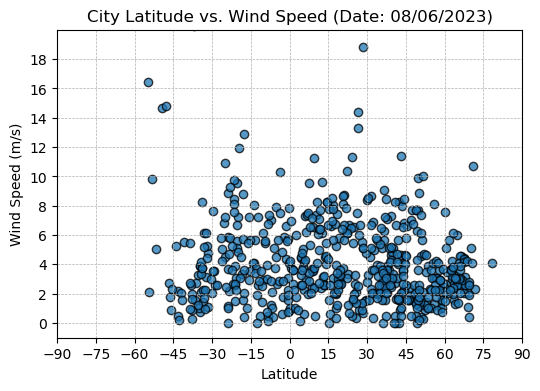

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 4))

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (Date: 08/06/2023)")
plt.grid(True)

# Incorporate the other graph properties
plt.xlim(-90, 90)  # Set the x-axis limits from -90 to 90 degrees (latitude range)
plt.ylim(-1, 20)  # Set the y-axis limits from -5 to 105% for cloudiness values
plt.xticks(np.arange(-90, 91, 15))  # Set the x-axis tick marks every 15 degrees
plt.yticks(np.arange(0, 20,2))  # Set the y-axis tick marks at intervals of 2%
plt.grid(True, linestyle="--", linewidth=0.5)  # Add gridlines with a dashed linestyle and linewidth

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data,y_data, y_label, title, coordinates):
    
    slope, intercept, r_value, _, _ = linregress(x_data, y_data)
    regression_line = slope * x_data + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    plt.scatter(x_data,y_data, edgecolors="black", alpha=0.75)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.plot(x_data, slope * x_data + intercept, color='red')
    print(f"The r value is:", r_value**2)



In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
2,bethel,41.3712,-73.4140,298.57,70,0,0.00,US,1691329698,25.42
4,ribeira grande,38.5167,-28.7000,298.37,73,20,3.60,PT,1691329698,25.22
8,mejit,10.2753,170.8646,301.42,78,100,7.35,MH,1691329699,28.27
10,labytnangi,66.6572,66.4183,300.69,47,16,2.65,RU,1691329699,27.54
11,qaqortoq,60.7167,-46.0333,279.79,85,22,2.65,GL,1691329699,6.64


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,waitangi,-43.9535,-176.5597,279.72,62,52,5.24,NZ,1691329697,6.57
1,inhambane,-23.8650,35.3833,296.15,53,11,5.87,MZ,1691329697,23.00
3,cabedelo,-6.9811,-34.8339,301.52,72,5,7.02,BR,1691329698,28.37
5,ushuaia,-54.8000,-68.3000,271.96,93,100,16.46,AR,1691329698,-1.19
6,blackmans bay,-43.0167,147.3167,279.55,91,33,2.20,AU,1691329698,6.40


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.32853340483029697


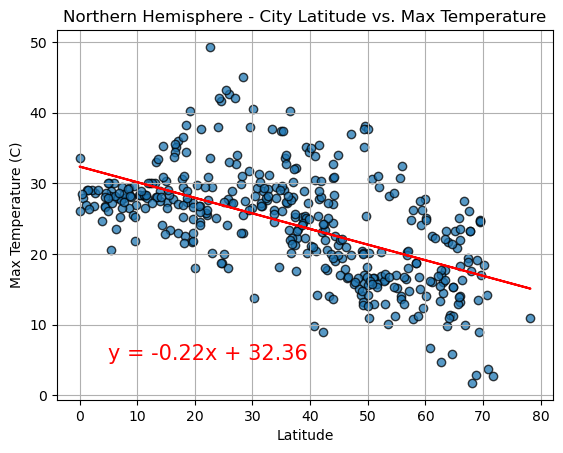

In [55]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"], "Max Temperature (C)", "Northern Hemisphere - City Latitude vs. Max Temperature", (5, 5))

The r value is: 0.6746378791324587


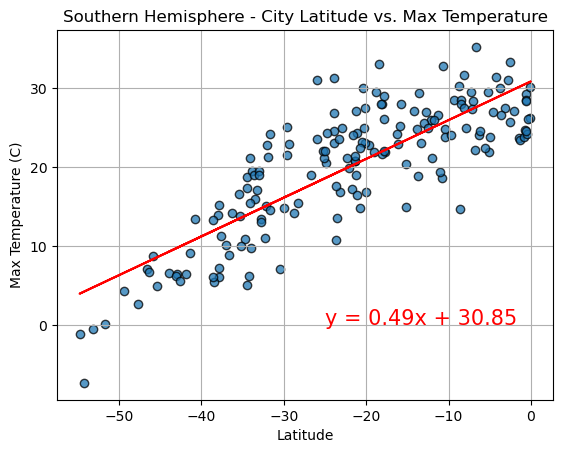

In [56]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp (C)"], "Max Temperature (C)", "Southern Hemisphere - City Latitude vs. Max Temperature", (-25,0))

**Discussion about the linear relationship:** 
- The is a low correlation of 0.33 that the higher the latitude the colder the temperature is.
- There is a strong correlation of 0.67 that the closer the latitude is to the equator (on the southern hemisphere) the hotter the temperature will be.
- on both hemisphere, temperature is warmer near the equator, aka latitude = 0

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.011439874135206399


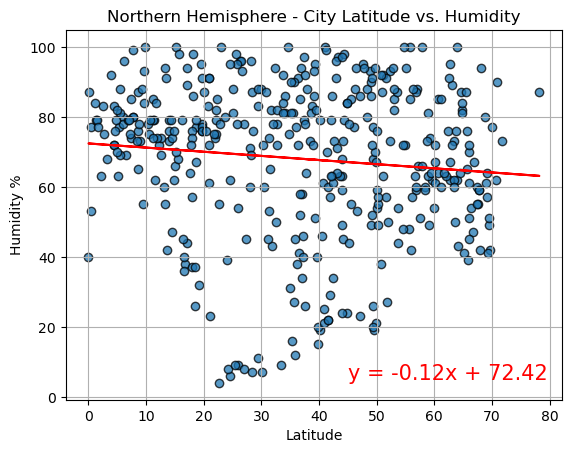

In [60]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity %", "Northern Hemisphere - City Latitude vs. Humidity", (45, 5))

The r value is: 0.017313366368871347


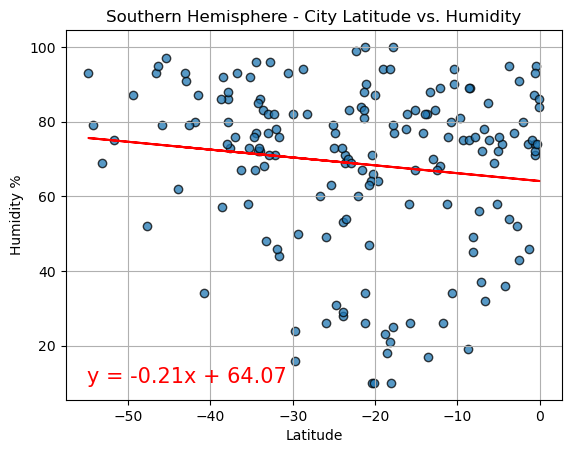

In [68]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity %", "Southern Hemisphere - City Latitude vs. Humidity", (-55,10))

**Discussion about the linear relationship:** 
- There is little correlation on both hemispheres between latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.025522830371729647


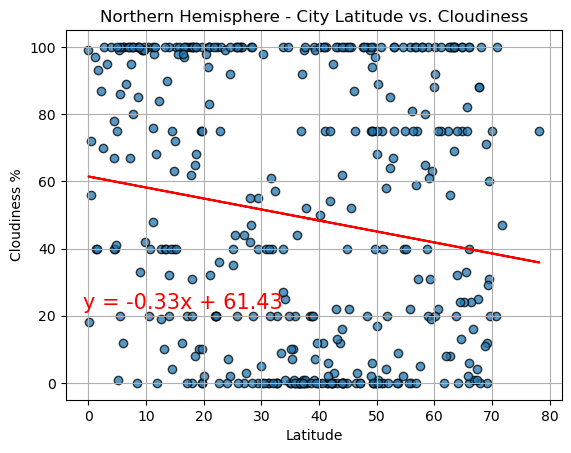

In [69]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness %", "Northern Hemisphere - City Latitude vs. Cloudiness", (-1, 22))

The r value is: 0.008418642755318713


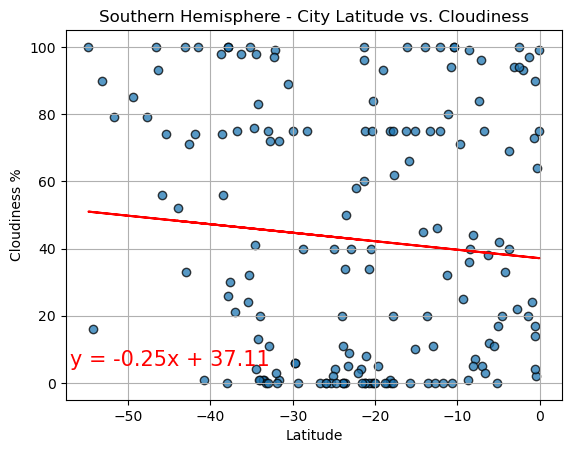

In [77]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness %", "Southern Hemisphere - City Latitude vs. Cloudiness", (-57,5))

**Discussion about the linear relationship:** 
- There is little correlation in both hemispheres between Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.03450021281548017


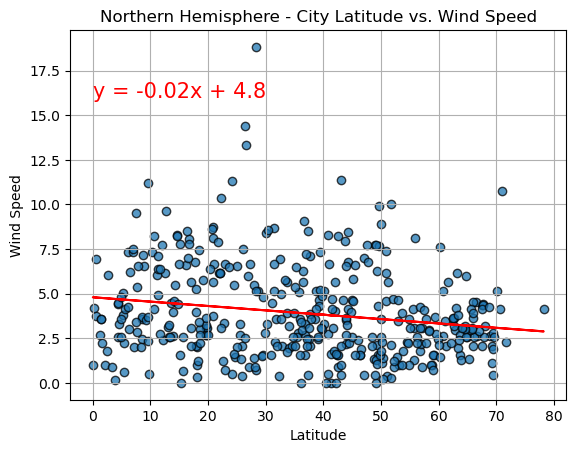

In [79]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed", (0, 16))

The r value is: 0.005480539305179943


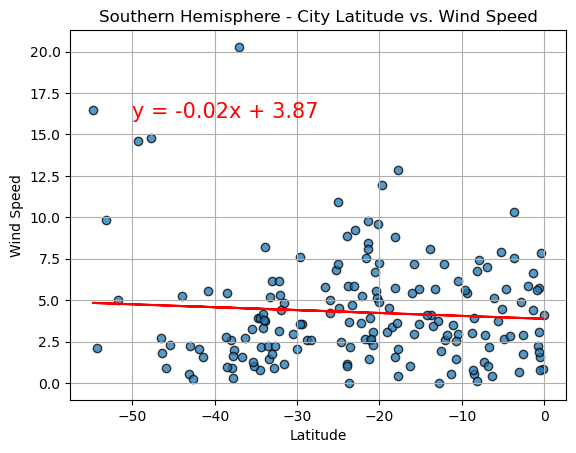

In [81]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", "Southern Hemisphere - City Latitude vs. Wind Speed", (-50,16))

**Discussion about the linear relationship:** 
- There is higher correlation between higher altitude and faster wind speed in the Northern Hemishpere at this time of the year than there is in Southern Hemisphere. 
- But the above distinction is not material, overall there is very little correlation between the wind speed and the latitude location of a city. 